# Preprocessing the properties dataset


### Importing the libraries

In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Importing the dataset

In [2]:
# Description: This script is used to connect to the MySQL database and fetch data from the property_info table.
# Load environment variables
load_dotenv()

try:
    connection = mysql.connector.connect(
        host=os.getenv('DB_HOST'),
        user=os.getenv('DB_USER'),
        password=os.getenv('DB_PASSWORD'),
        database='properties'
    )

    if connection.is_connected():
        print('Connected to MySQL database')

    # Define your SQL query and fetch data
    sql_query = "SELECT * FROM property_info"
    df = pd.read_sql(sql_query, connection)

except Error as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    if connection.is_connected():
        connection.close()
        print('MySQL connection closed')


Connected to MySQL database
MySQL connection closed


/var/folders/z3/qv2p67717670lmtsx4lfkzpw0000gn/T/ipykernel_97023/1262242826.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, connection)


### Start preprocessing

In [3]:
df.head()

,id,url,title,city,region,type,num_rooms,num_bathrooms,size,price
0,1,https://emirates.estate/property/o45496/,"Apartment in Dubai Marina, № 45496",Dubai,Dubai Marina,Apartment,2,2,148.60,6250000.0
1,2,https://emirates.estate/property/o21299/,Apartment in GOLF SUITES in Dubai Hills Estate...,Dubai,Dubai Hills Estate,Apartment,2,2,102.20,1500890.0
2,3,https://emirates.estate/property/o109134/,"Townhouse in Nadd Al Sheba, № 109134",Dubai,Nadd Al Sheba,Townhouse,3,3,287.26,4100000.0
3,4,https://emirates.estate/property/o8201/,"Apartment in Dubai, № 8201",Dubai,None,Apartment,2,3,143.00,2000000.0
4,5,https://emirates.estate/property/golf-grand-25...,Apartment in GOLF SUITES in Dubai Hills Estate...,Dubai,Dubai Hills Estate,Apartment,2,2,99.31,2079890.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19384 entries, 0 to 19383
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19384 non-null  int64  
 1   url            19384 non-null  object 
 2   title          19384 non-null  object 
 3   city           19384 non-null  object 
 4   region         16111 non-null  object 
 5   type           19365 non-null  object 
 6   num_rooms      19384 non-null  int64  
 7   num_bathrooms  19384 non-null  int64  
 8   size           19384 non-null  float64
 9   price          19384 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.5+ MB


In [5]:
df.nunique()

id               19384
url              19345
title            19345
city                 1
region             136
type                16
num_rooms           19
num_bathrooms       19
size              5940
price             7211
dtype: int64

In [6]:
df.describe()

,id,num_rooms,num_bathrooms,size,price
count,19384.000000,19384.000000,19384.000000,1.938400e+04,1.938400e+04
mean,9692.500000,2.385369,2.769810,2.545906e+03,8.585803e+06
std,5595.823145,3.425411,3.165611,1.684057e+05,4.193866e+07
min,1.000000,1.000000,1.000000,4.000000e-01,2.500000e+02
25%,4846.750000,1.000000,1.000000,7.870000e+01,1.290000e+06
50%,9692.500000,2.000000,2.000000,1.284000e+02,2.365500e+06
75%,14538.250000,3.000000,4.000000,2.289025e+02,4.800000e+06
max,19384.000000,356.000000,326.000000,1.858050e+07,1.958890e+09


In [7]:
df.isnull().sum()

id                  0
url                 0
title               0
city                0
region           3273
type               19
num_rooms           0
num_bathrooms       0
size                0
price               0
dtype: int64

In [8]:
df[df['size'] < 0]

,id,url,title,city,region,type,num_rooms,num_bathrooms,size,price


In [9]:
df2 = df.copy(deep=True)
df2.drop(["id", "url", "title", "city"], axis=1, inplace=True)

In [10]:
df2.dropna(subset=['region', 'type'], axis=0, inplace=True)

In [11]:
df2.head()

,region,type,num_rooms,num_bathrooms,size,price
0,Dubai Marina,Apartment,2,2,148.60,6250000.0
1,Dubai Hills Estate,Apartment,2,2,102.20,1500890.0
2,Nadd Al Sheba,Townhouse,3,3,287.26,4100000.0
4,Dubai Hills Estate,Apartment,2,2,99.31,2079890.0
5,Umm Suqeim,Apartment,1,2,76.10,1510000.0


In [12]:
df2.isnull().sum()

region           0
type             0
num_rooms        0
num_bathrooms    0
size             0
price            0
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16102 entries, 0 to 19383
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         16102 non-null  object 
 1   type           16102 non-null  object 
 2   num_rooms      16102 non-null  int64  
 3   num_bathrooms  16102 non-null  int64  
 4   size           16102 non-null  float64
 5   price          16102 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 880.6+ KB


In [14]:
df2.nunique()

region            136
type               16
num_rooms          17
num_bathrooms      18
size             5295
price            6289
dtype: int64

In [15]:
df2.drop_duplicates(inplace=True)

In [16]:
df2.describe()

,num_rooms,num_bathrooms,size,price
count,15074.000000,15074.000000,1.507400e+04,1.507400e+04
mean,2.294547,2.725289,1.178473e+03,8.106836e+06
std,3.201417,3.446143,9.148213e+04,4.372732e+07
min,1.000000,1.000000,4.000000e-01,2.500000e+02
25%,1.000000,1.000000,7.780000e+01,1.250000e+06
50%,2.000000,2.000000,1.223750e+02,2.325635e+06
75%,3.000000,4.000000,2.144900e+02,4.650000e+06
max,356.000000,326.000000,1.120350e+07,1.958890e+09


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15074 entries, 0 to 19383
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         15074 non-null  object 
 1   type           15074 non-null  object 
 2   num_rooms      15074 non-null  int64  
 3   num_bathrooms  15074 non-null  int64  
 4   size           15074 non-null  float64
 5   price          15074 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 824.4+ KB


### Encoding categorical data

In [18]:
# encoder = OneHotEncoder(sparse_output=False)
# one_hot_encoded = encoder.fit_transform(df2[['region', 'type']])

In [19]:
# encoded_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['region', 'type']))

In [20]:
# df3 = pd.concat([df2.drop(columns=['region', 'type']), encoded_data], axis=1)

In [21]:
df3 = df2.copy(deep=True)

df3 = pd.get_dummies(df3, columns=['region', 'type'], drop_first=True)

bool_cols = df3.select_dtypes(include='bool').columns
df3[bool_cols] = df3[bool_cols].astype('int64')

df3.reset_index(drop=True, inplace=True)


In [22]:
df3.tail()

,num_rooms,num_bathrooms,size,price,region_Al Barsha,region_Al Barsha South,region_Al Furjan,region_Al Garhoud,region_Al Hamriya,region_Al Jaddaf,...,type_Hotel,type_Hotel Apartment,type_Labor Camp,type_Land,type_Office,type_Penthouse,type_Shop,type_Townhouse,type_Villa,type_Warehouse
15069,2,3,102.6,1081000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15070,1,1,73.4,2200000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15071,2,3,319.6,3072000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15072,1,2,126.2,941000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15073,4,5,259.8,2000000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15074 entries, 0 to 15073
Columns: 154 entries, num_rooms to type_Warehouse
dtypes: float64(2), int64(152)
memory usage: 17.7 MB


In [24]:
df3.isnull().sum()

num_rooms           0
num_bathrooms       0
size                0
price               0
region_Al Barsha    0
                   ..
type_Penthouse      0
type_Shop           0
type_Townhouse      0
type_Villa          0
type_Warehouse      0
Length: 154, dtype: int64

### Check for outliers

- Plots of the features with outliers

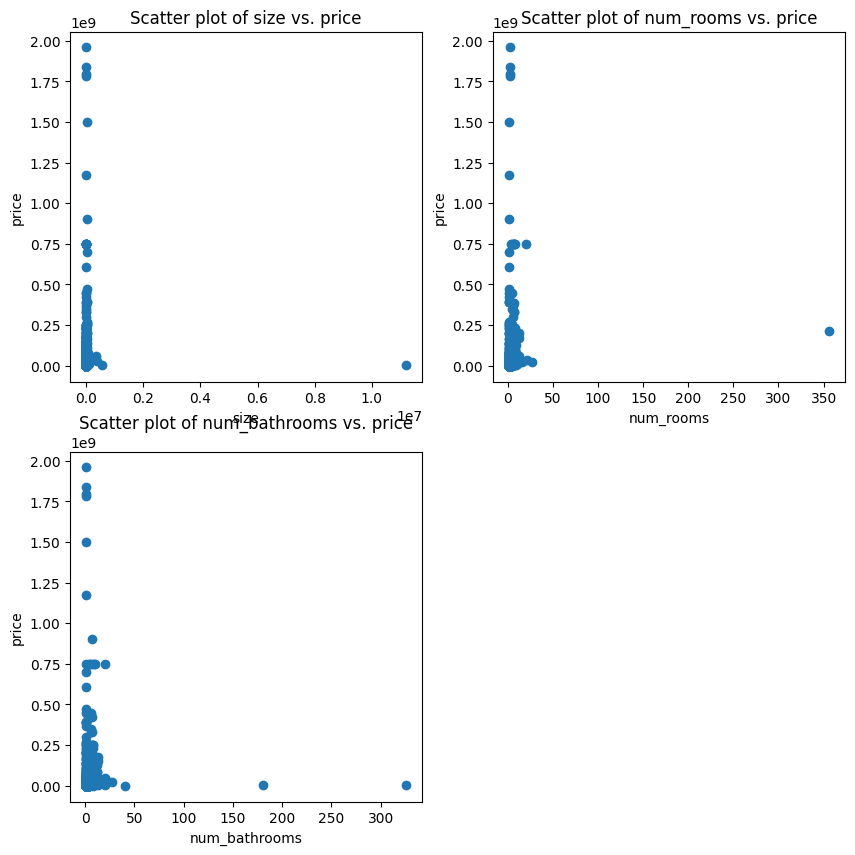

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(df3['size'], df3['price'])
axs[0, 0].set_title('Scatter plot of size vs. price')
axs[0, 0].set_xlabel('size')
axs[0, 0].set_ylabel('price')

axs[0, 1].scatter(df3['num_rooms'], df3['price'])
axs[0, 1].set_title('Scatter plot of num_rooms vs. price')
axs[0, 1].set_xlabel('num_rooms')
axs[0, 1].set_ylabel('price')

axs[1, 0].scatter(df3['num_bathrooms'], df3['price'])
axs[1, 0].set_title('Scatter plot of num_bathrooms vs. price')
axs[1, 0].set_xlabel('num_bathrooms')
axs[1, 0].set_ylabel('price')

# Hide the last subplot
axs[1, 1].axis('off')

plt.show()

- Remove outliers

In [26]:
df3 = df3[df3['size'] < 200000]
df3 = df3[df3['num_rooms'] < 15]
df3 = df3[df3['price'] < 6 * 10**8]
df3 = df3[df3['num_bathrooms'] < 15]

- Plots after removing outliers

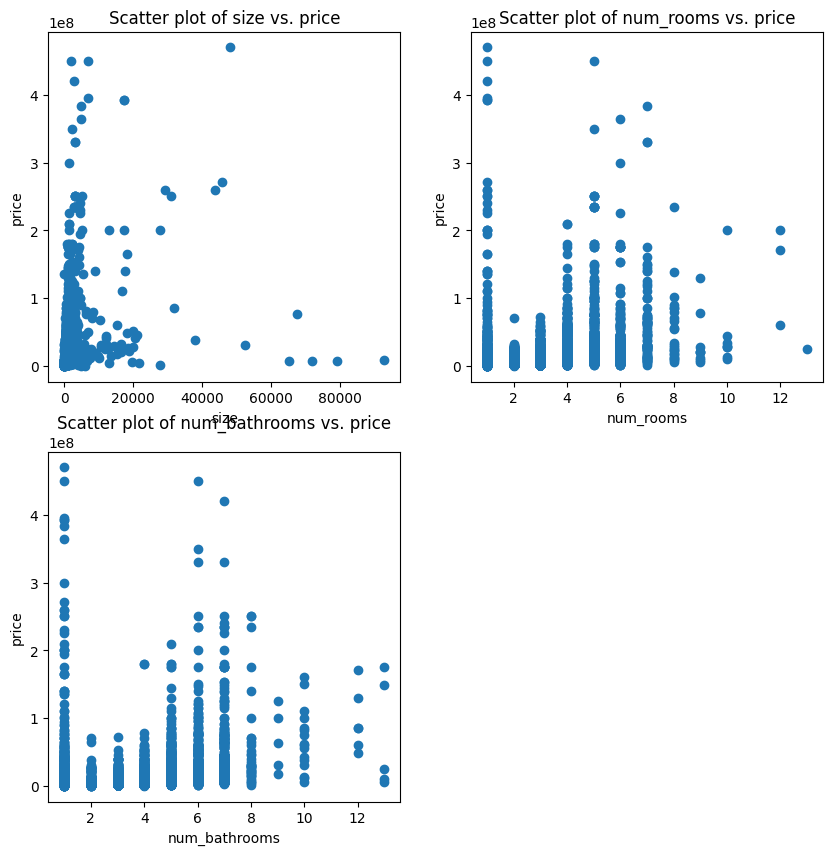

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(df3['size'], df3['price'])
axs[0, 0].set_title('Scatter plot of size vs. price')
axs[0, 0].set_xlabel('size')
axs[0, 0].set_ylabel('price')

axs[0, 1].scatter(df3['num_rooms'], df3['price'])
axs[0, 1].set_title('Scatter plot of num_rooms vs. price')
axs[0, 1].set_xlabel('num_rooms')
axs[0, 1].set_ylabel('price')

axs[1, 0].scatter(df3['num_bathrooms'], df3['price'])
axs[1, 0].set_title('Scatter plot of num_bathrooms vs. price')
axs[1, 0].set_xlabel('num_bathrooms')
axs[1, 0].set_ylabel('price')

# Hide the last subplot
axs[1, 1].axis('off')

plt.show()

### Create a correlation matrix

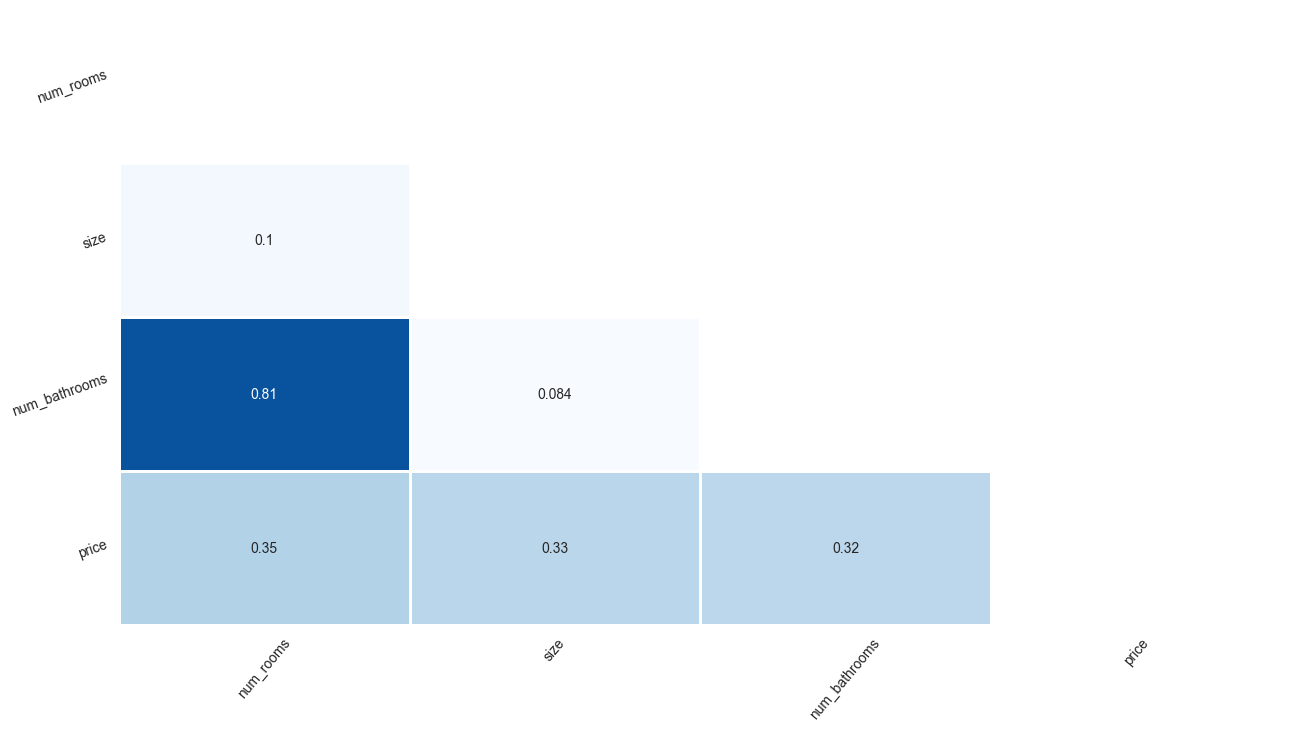

In [28]:
# create new dataframe with selected columns
df_selected = df3[['num_rooms', 'size', 'num_bathrooms', 'price']]

# correlation matrix
correlation = abs(df_selected.corr())

# select the lower triangle of the correlation matrix and mask the upper triangle
triangle = np.tril(correlation, k = -1)
mask = triangle == 0

# plot size
plt.figure(figsize=(15, 8))

# set white grid lines
sns.set_style(style="white")

# heat map
sns.heatmap(triangle, center=0.5, cmap="Blues", annot=True, xticklabels=correlation.index, yticklabels=correlation.columns, cbar=False, linewidths=1, mask=mask)
plt.xticks(rotation = 50)
plt.yticks(rotation = 20)
plt.show()

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15045 entries, 0 to 15073
Columns: 154 entries, num_rooms to type_Warehouse
dtypes: float64(2), int64(152)
memory usage: 17.8 MB


In [30]:
df4 = df3.copy(deep=True)

df4.drop(['num_bathrooms'], axis=1, inplace=True)

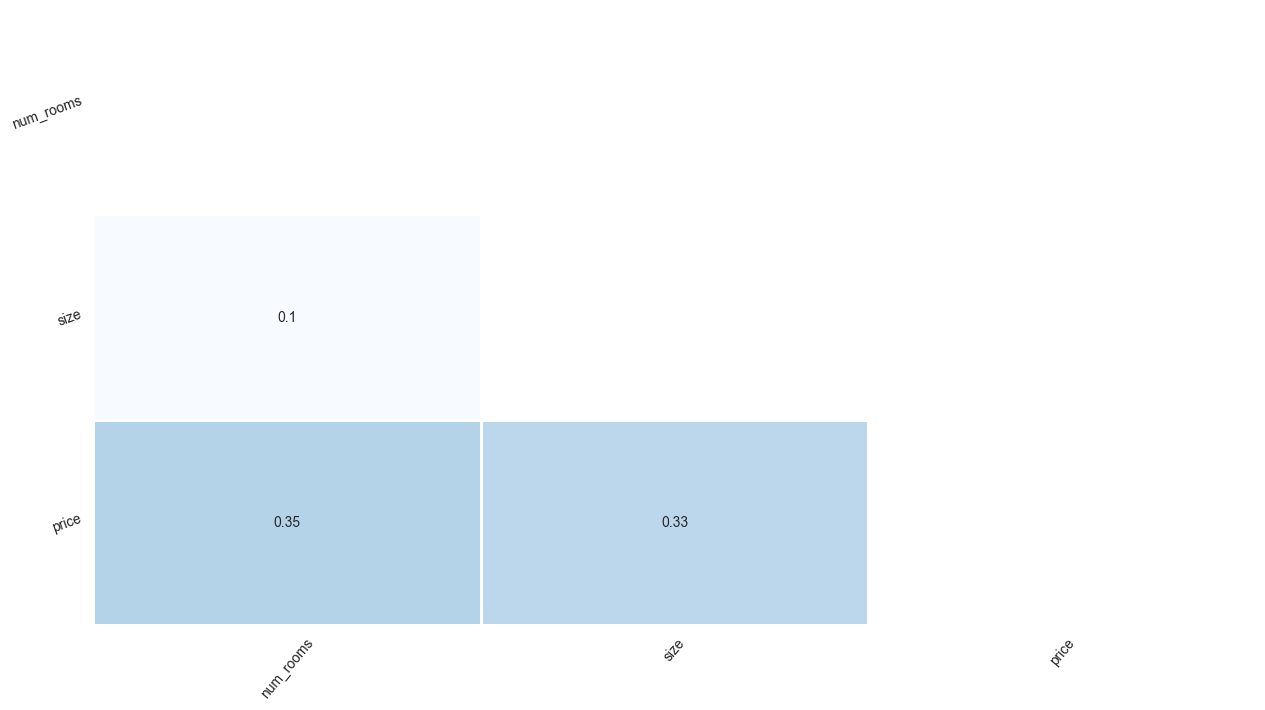

In [31]:
# create new dataframe with selected columns
df_selected = df4[['num_rooms', 'size', 'price']]

# correlation matrix
correlation = abs(df_selected.corr())

# select the lower triangle of the correlation matrix and mask the upper triangle
triangle = np.tril(correlation, k = -1)
mask = triangle == 0

# plot size
plt.figure(figsize=(15, 8))

# set white grid lines
sns.set_style(style="white")

# heat map
sns.heatmap(triangle, center=0.5, cmap="Blues", annot=True, xticklabels=correlation.index, yticklabels=correlation.columns, cbar=False, linewidths=1, mask=mask)
plt.xticks(rotation = 50)
plt.yticks(rotation = 20)
plt.show()

In [32]:
df4.head()

,num_rooms,size,price,region_Al Barsha,region_Al Barsha South,region_Al Furjan,region_Al Garhoud,region_Al Hamriya,region_Al Jaddaf,region_Al Khawaneej,...,type_Hotel,type_Hotel Apartment,type_Labor Camp,type_Land,type_Office,type_Penthouse,type_Shop,type_Townhouse,type_Villa,type_Warehouse
0,2,148.60,6250000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,102.20,1500890.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,287.26,4100000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.31,2079890.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,76.10,1510000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Preprocessing the train dataset

In [33]:
y = df4['price']
X = df4.drop(['price'], axis=1)
X.reset_index(drop=True, inplace=True)

In [34]:
X.tail()

,num_rooms,size,region_Al Barsha,region_Al Barsha South,region_Al Furjan,region_Al Garhoud,region_Al Hamriya,region_Al Jaddaf,region_Al Khawaneej,region_Al Kifaf,...,type_Hotel,type_Hotel Apartment,type_Labor Camp,type_Land,type_Office,type_Penthouse,type_Shop,type_Townhouse,type_Villa,type_Warehouse
15040,2,102.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15041,1,73.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15042,2,319.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15043,1,126.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15044,4,259.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
y

0        6250000.0
1        1500890.0
2        4100000.0
3        2079890.0
4        1510000.0
           ...    
15069    1081000.0
15070    2200000.0
15071    3072000.0
15072     941000.0
15073    2000000.0
Name: price, Length: 15045, dtype: float64

In [36]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (15045, 152)
The shape of y is: (15045,)


```
import joblib

Load the saved model
loaded_model = joblib.load('your_model_filename.pkl')
model_filename = 'iris_model.pkl'
joblib.dump(model, model_filename)
``````